# UE07 Explorative Daten Analyse am Beispiel Iris

Die explorative Datenanalyse (EDA) ist ein wichtiger Schritt im *Data Science*-Prozess, bei dem Daten untersucht und analysiert werden, um Muster, Zusammenhänge, Anomalien und grundlegende Eigenschaften zu erkennen. Ziel ist es, die Daten besser zu verstehen und die Grundlage für weitere Analysen, Modellierungen oder Entscheidungen zu schaffen.

## Wichtige Ziele der EDA

1. Daten verstehen: Aufbau, Typen, Wertebereiche und Verteilungen kennenlernen.
2. Zusammenhänge aufdecken: Beziehungen zwischen Variablen erkennen.
3. Anomalien identifizieren: Fehler, Ausreißer oder fehlende Werte finden.
4. Hypothesen generieren: Potenzielle Fragestellungen und Modellierungsansätze entwickeln.

Stell dir vor, du möchtest herausfinden, welche Merkmale die drei Blumensorten am besten voneinander unterscheiden. Durch eine Tabelle allein ist das schwierig, oder? 

In [4]:
# Some libs...
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## 0) Iris Dataset laden

**Spaltenübersicht:**

- `sepal_length`: Länge des Kelchblatts (in cm).
- `sepal_width`: Breite des Kelchblatts (in cm).
- `petal_length`: Länge des Blütenblatts (in cm).
- `petal_width`: Breite des Blütenblatts (in cm).
- `species`: Kodierung der Blumenart (0 = setosa, 1 = versicolor, 2 = virginica).

In [6]:
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris.columns=['sepal_length', 'sepal_width','petal_length', 'petal_width']
iris['species'] = data.target

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1) Datenverständnis

- Datenform: Anzahl Zeilen und Spalten
- Spaltentypen: Numerisch, kategorisch, Text, Datum ...

In [10]:
iris.shape

(150, 5)

In [12]:
# Datentypen und fehlende Werte checken
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 2) Univariate Analyse (eine Variable)
**Ziel**: Die Verteilung und Eigenschaften einzelner Variablen analysieren.

**Numerische Variablen**:

    Mittelwert, Median, Standardabweichung, Minimum/Maximum, Verteilung (Histogramme).
    Identifikation von Ausreißern.

**Kategorische Variablen**:

    Häufigkeiten und Anteile.
    Visualisierungen wie Balkendiagramme oder Kreisdiagramme.

In [14]:
# Liefert zusammenfassende Statistik für numerische Variablen
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


**Statistische Kennwerte:**
Weitere Infos zu Kennwerten wie `count`, `mean` oder `max` findet man in der Pandas-Dokumentation (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Die Bedeutung dieser Kennwerte sollte allerdings klar sein, daher gehen wir hier nicht weiter ins Detail.

`std` (Standardabweichung): Ist ein Maß, wie weit die Werte in einer Datenreihe im Durchschnitt von ihrem Mittelwert entfernt sind. Eine kleine Standardabweichung bedeutet, dass die Werte nah beieinander liegen.

    Beispiel: Die Standardabweichung der Blütenblattlänge (petal_length) beträgt 1.77 cm, was zeigt, dass die Werte stärker streuen als bei anderen Merkmalen.

`25%` (1. Quartil): Der Wert, unter dem 25% der Daten liegen.
        
    Beispiel: 25% der Kelchblattlängen (sepal_length) sind ≤ 5.1 cm.

`50%` (Median, 2. Quartil): Der Wert, bei dem die Daten in zwei Hälften geteilt werden.
        
    Beispiel: 50% der Blütenblattbreiten (petal_width) sind ≤ 1.3 cm und 50% sind ≥  1.3 cm.

`75%` (3. Quartil): Der Wert, unter dem 75% der Daten liegen.

    Beispiel: 75% der Blütenblattlängen (petal_length) sind ≤ 5.1 cm.


### Häufigkeitsverteilung

Ein Histogramm ist sinnvoll, wenn du die Verteilung eines einzelnen numerischen Merkmals visualisieren möchtest. Es hilft dabei, folgende Fragen zu beantworten:

- Wie sind die Daten verteilt? Sind sie symmetrisch, schief, oder gibt es mehrere Peaks?
- Welche Werte kommen häufig oder selten vor?
- Gibt es Ausreißer?

Quelle: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

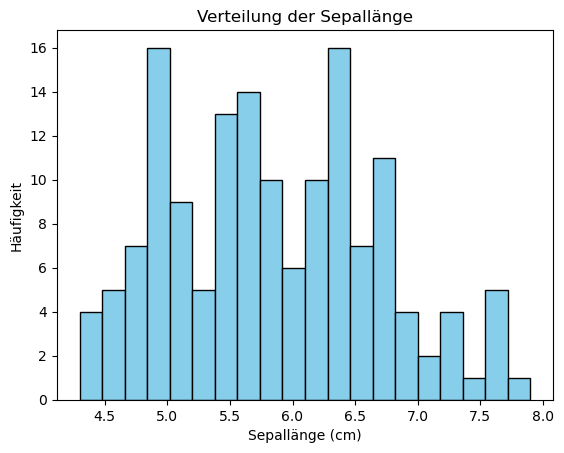

In [16]:
# Histogramm für sepal_length (numerische Variable)
# bins: legt die Anzahl der Intervalle (Balken) fest
plt.hist(iris['sepal_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Verteilung der Sepallänge')
plt.xlabel('Sepallänge (cm)')
plt.ylabel('Häufigkeit')
plt.show()


**Unterscheidung nach Anzahl Gipfel**
<img src="./imgs/anzahl-gipfel.png">

**Unterscheidung nach Schiefe**

Bei einer Schiefe ist von sog. Ausreißern auszugehen. In diesem Fall ist das aritmethische Mittel mit Vorsicht zu betrachten.
<img src="./imgs/schiefe.png">

Quelle: https://christophkorb.de/

### Boxplot
Mit einem Boxplot kann man eine Vielzahl von Informationen über deine Daten grafisch darstellen. In einem Boxplot können unter anderem der Median, der Interquartilsabstand der Range und die **Ausreißer** abgelesen werden.
Quelle: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

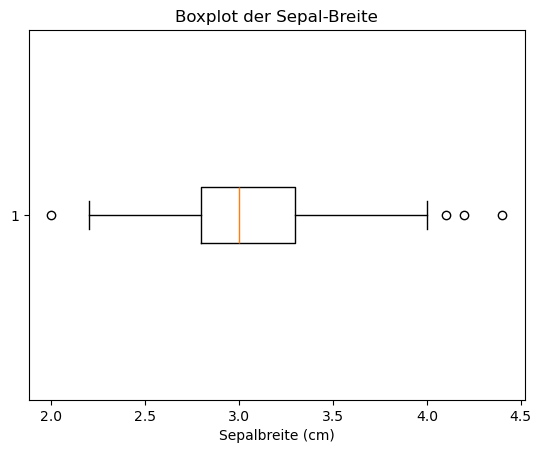

In [18]:
# Ausreißer für Sepal-Width identifizieren -> alle Datenpunkte nach den Whisker
plt.boxplot(iris['sepal_width'], vert=False)

plt.title('Boxplot der Sepal-Breite')
plt.xlabel('Sepalbreite (cm)')
plt.show()

### Hüfigkeit bzw. Anteile bei kategorische Variablen ermitteln
Quelle: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

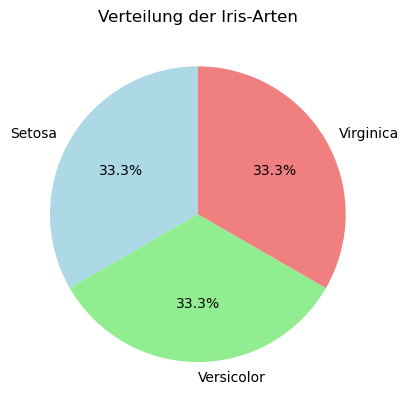

In [20]:
# Für kategoriale Merkmale gibt das Dataset sonst nichts her! Könnte man auch mit Histogramm machen!
species_counts = iris['species'].value_counts()

plt.pie(species_counts, labels=['Setosa', 'Versicolor','Virginica'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Verteilung der Iris-Arten')
#plt.legend()
plt.show()

## 3) Bivariate Analyse (2 Variablen)

**Ziel**: Beziehungen zwischen zwei Variablen untersuchen.
- Numerisch-Numerisch: Scatterplots, Korrelationsmatrix.
- Kategorisch-Numerisch: Boxplots

### Scatterplot
Ein Scatter-Plot zeigt, wie zwei numerische Variablen zueinander in Beziehung stehen.

Quelle: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Mögliche Farben: https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors

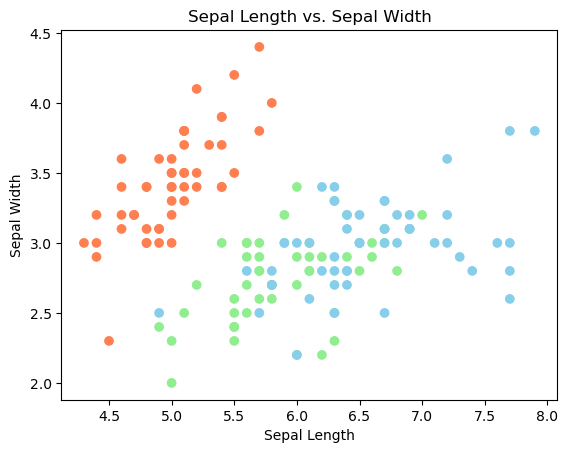

In [22]:
# Zwei numerische Variablen
colors = {0: 'coral', 1: 'lightgreen', 2: 'skyblue'}

plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

### Korrelationsmatrix
Die Korrelationsmatrix wird speziell für numerische Variablen verwendet, da sie auf dem Korrelationskoeffizienten basiert, der die Stärke und Richtung linearer Zusammenhänge zwischen zwei numerischen Variablen verdeutlicht.

**Hinweis**:
- Werte liegen zwischen -1 (starke negative Korrelation) und +1 (starke positive Korrelation).
- Ein Wert nahe 0 bedeutet, dass es **keine lineare** Beziehung gibt.

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.117570      0.871754     0.817941  0.782561
sepal_width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
petal_length      0.871754    -0.428440      1.000000     0.962865  0.949035
petal_width       0.817941    -0.366126      0.962865     1.000000  0.956547
species           0.782561    -0.426658      0.949035     0.956547  1.000000


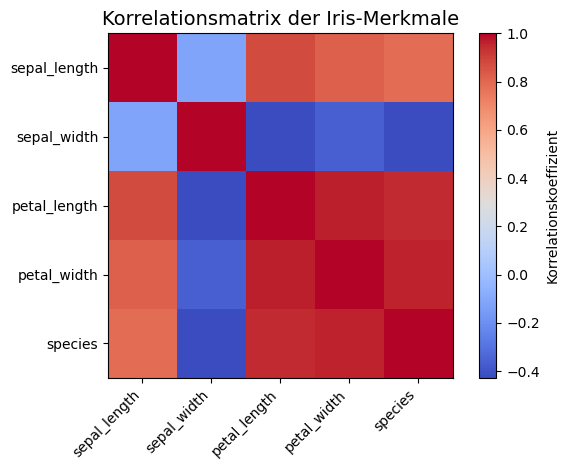

In [24]:
correlation_matrix = iris.corr()
print(correlation_matrix)

# Oder als Grundlage für eine sog. Heatmap
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Korrelationskoeffizient')

plt.xticks(np.arange(len(iris.columns)), iris.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(iris.columns)), iris.columns)
plt.title("Korrelationsmatrix der Iris-Merkmale", fontsize=14)
plt.tight_layout()

plt.show()

### Kategorisch-Numerisch: Boxplot-Beispiel 
Boxplot über die Kategorien:

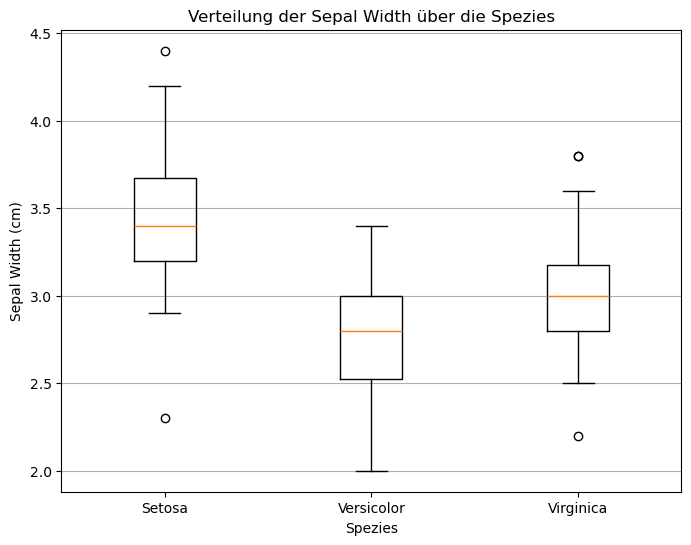

In [26]:
#{0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Boxplot erstellen
plt.figure(figsize=(8, 6))
plt.boxplot(
    [iris[iris['species'] == 0]['sepal_width'],
     iris[iris['species'] == 1]['sepal_width'],
     iris[iris['species'] == 2]['sepal_width']],
    labels=['Setosa', 'Versicolor', 'Virginica']
)
plt.title('Verteilung der Sepal Width über die Spezies')
plt.xlabel('Spezies')
plt.ylabel('Sepal Width (cm)')
plt.grid(axis='y')
plt.show()


## 4) Datenbereinigung

**Fehlende Werte**:
- Identifizieren (`isnull().sum()`).
- Behandeln (z.B. Imputation, Entfernung).

**Ausreißer**:
- Identifikation durch Boxplots oder Z-Scores.
- Umgang (z. B. Entfernen oder Skalieren).

**Inkonsistenzen**:
- Doppelte Werte, falsche Datentypen, widersprüchliche Einträge (Z.B. Alter v. 450 oder Gewicht 7).


## 5) Anhang
### Ermittlung von Ausreißern auf Code-Ebene
#### Z-Score
Der Z-Score ist ein statistisches Maß, das beschreibt, wie weit ein Wert von seinem Mittelwert in einer Datenverteilung entfernt ist, gemessen in Einheiten der Standardabweichung. Der Z-Score wird häufig verwendet, um ungewöhnliche oder extreme Werte (Ausreißer) in einer Datenmenge zu identifizieren.

Die **Formel für den Z-Score** lautet:

$$
Z = \frac{x - \mu}{\sigma}
$$

- **𝑍**: Der Z-Score (standardisierter Wert).
- **𝑥**: Der Wert, den wir untersuchen.
- **𝜇**: Der Mittelwert der Daten.
- **𝜎**: Die Standardabweichung der Daten.

> Die Standardabweichung ist ein Maß für die Streuung in Datenreihen und gibt die mittlere Abweichung der Werte vom arithmetischen Mittel an. Quelle: https://datatab.de/tutorial/standardabweichung

In [28]:
from scipy.stats import zscore

data = {'score': [60, 70, 75, 80, 85, 100]}
df = pd.DataFrame(data)

df['z_score'] = zscore(df['score'])

print(df)
print(df['score'].mean())

   score   z_score
0     60 -1.469937
1     70 -0.668153
2     75 -0.267261
3     80  0.133631
4     85  0.534522
5    100  1.737198
78.33333333333333


In der Praxis wird ein Schwellenwert für Z-Scores definiert, um Ausreißer zu identifizieren:

- |Z| > 3: Weit verbreitete Regel, dass Werte mit Z-Scores größer als 3 (oder kleiner als -3) Ausreißer sind.

> Die genaue Definition, ab wann ein Wert als Ausreißer gilt, ist nicht eindeutig festgelegt und hängt von der verwendeten Methode sowie dem spezifischen Kontext ab.

### Boxplot
Ausreißer basierend auf Boxplot identifizieren. Hierzu muss man mit dem Key `whiskers` auf das *Dictionary* `box` zugreifen. 

lower whisker:  2.2
upper whisker:  4.0

lower whisker:  2.05
upper whisker:  4.05


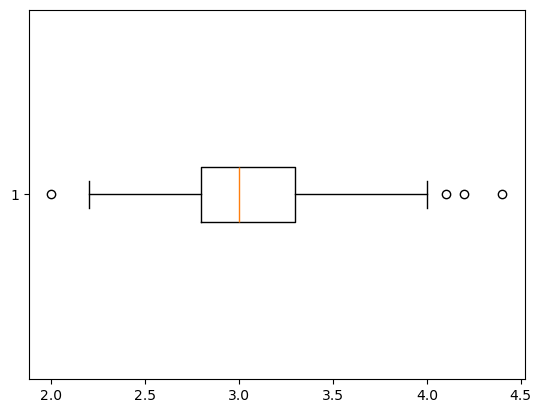

In [30]:
box=plt.boxplot(iris['sepal_width'], vert=False)

# Entweder auslesen
lower_whisker=box['whiskers'][0].get_xdata()[1]
upper_whisker=box['whiskers'][1].get_xdata()[1]

print("lower whisker: ", lower_whisker)
print("upper whisker: ", upper_whisker)

# Oder manuell mit "Q1 - IQR * 1.5" für unteren und "Q3 + IQR * 1.5" für oberen Whisker berechnen
Q1 = iris['sepal_width'].quantile(0.25)
Q3 = iris['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nlower whisker: ",lower_bound)
print("upper whisker: ", upper_bound)

In [32]:
# Whisker-Filer anwenden, um Ausreißer auf Code-Ebene zu identifieren
outliers = iris[(iris['sepal_width'] < lower_whisker) | (iris['sepal_width'] > upper_whisker)]
outliers

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


### Quellen
- https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py
- https://matplotlib.org/stable/users/explain/quick_start.html#quick-start